<a href="https://colab.research.google.com/github/rileyseefeldt/MAT421/blob/main/HW19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ch 18 Root Finding

##19.1 Root Finding Problem Statement

The "root" of a function f(x), is the value xi such that f(xi) = 0. For some fucntions, such as linear and quadratic equations, finding roots are easy. However, this is not the case for many functions. Oftentimes, it is difficult to find exact solutions of a functions roots, so we need mathematical methods that allow us to approximate these values.

##19.2 Tolerance

The word tolerance refers to how much error or precision is required for a certain method of computation. Specificially for calculating function roots, tolerance refers to the exact amount in the negative and positive direction that the computer is allowed to get within the root's "actual value".

In [17]:
#function f(x) = x^2 + tol/2
def f(x, tol):
    return x**2 + tol / 2

#define acceptable tolerance
tol = 1e-3

#calculate error for function at x=0
error = abs(f(0, tol))

##althogh program has no real roots this solution should fall within the acceptable level of tolerance
if error <= tol:
    print(f"Solution accepted: f(0) = {error}, within tolerance {tol}")
else:
    print(f"Solution rejected: f(0) = {error}, exceeds tolerance {tol}")

Solution accepted: f(0) = 0.0005, within tolerance 0.001


##19.3 Bisection Method

The bisection method is a root finding algorythm which uses iteratively uses the intermediate value theorem to find roots:

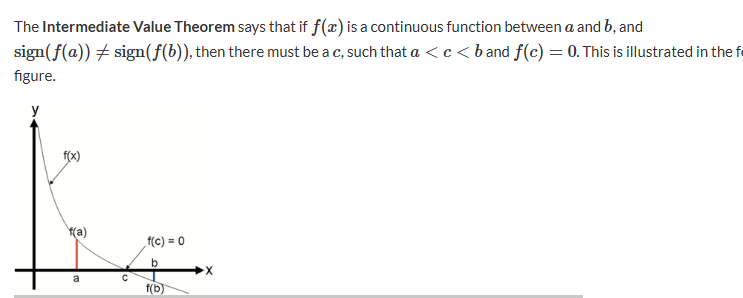


By moving the bounds a and b closer together for each iteration, if there is a real root, the computer will find it because the values f(a) and f(b) will converge at 0 (or the specified level of tolerance). However, this method only works for continuous functions which have both negative and positive values as required by the intermediate value theorem.

root of f(x) at x =  2.706527954496778


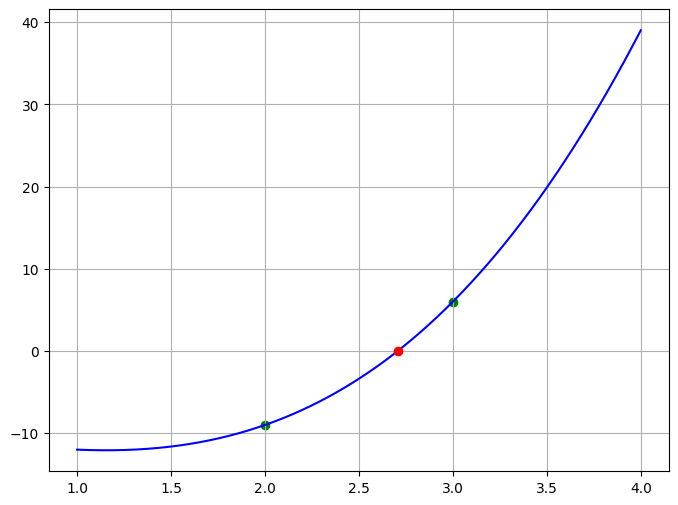

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect

#define f(x) to be a function with values >0 and <0
def f(x):
    return x**3 - 4*x - 9  # Example function

#f(a) < 0, f(b) > 0
a, b = 2, 3

#calculate the roots with scipy function
root = bisect(f, a, b)

print("root of f(x) at x = ", root)

#generate 400 points to visualize around a and b
x_vals = np.linspace(a - 1, b + 1, 400)
y_vals = f(x_vals)

#plot function with a, b in green and the calculated root in red
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, color='blue')
plt.scatter(root, f(root), color='red', zorder=3)
plt.scatter([a, b], [f(a), f(b)], color='green')
plt.grid(True)
plt.show()


##19.4 Newton-Raphson Method

The Newton-Raphson Method is a recursive algorythm which aims to find a root by continuoisly making "guesses." First, the program will make an initial guess of the solution, then (unless the computer is very lucky) it will compute the linear approximation of the function which intersects with the x axis. This new point where the line and the x axis meet is the new guess for the computer. Therefore it will repeat this process until a root (or guess within the specified level of tolerance) is found.

Each guess (xi) is called a "Newton Step" and is determined by the equation:

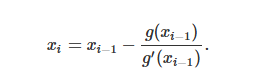

root of f(x) at x =  2.7065279544979353


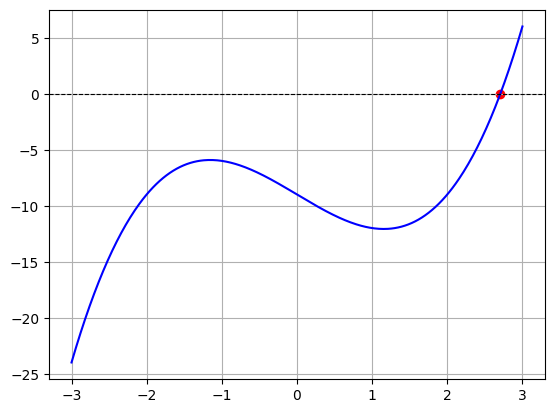

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff

#define f(x) to be a function with values >0 and <0
def f(x):
    return x**3 - 4*x - 9

#calculate derivative
def df(x):
    return 3*x**2 - 4

#newton Raphson method for calculating roots
def newton_raphson(x0, tol):
    while True:
      #applies formula listed above
        x_new = x0 - f(x0) / df(x0)
        #if within boudns of tolerance leave loop
        if abs(x_new - x0) < tol:
            break
        x0 = x_new
    return x_new

#initial guess
x0 = 2.5
#calls function to find actual root with 1e-6 of tolerance
root = newton_raphson(x0, 1e-6)

print("root of f(x) at x = ", root)

#creates 400 points between -3 and 3 (where the root is)
x_vals = np.linspace(-3, 3, 400)
y_vals = f(x_vals)

#plot graph with root
plt.plot(x_vals, y_vals, color='blue')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.scatter(root, f(root), color='red')
plt.grid()
plt.show()

In [20]:
#